In [40]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../..')
from funcs.stats import get_stats
from funcs.xarray_tools import find_cor_ts
from funcs.plotting import map_grid_clean, add_text
from constants.colors import loc_colors

from taus import decorrelation_temporal_model

ModuleNotFoundError: No module named 'xrspatial'

In [2]:
# fps = list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar').glob('*_tau.nc'))
fps = list(Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar').glob('*_tau.nc'))
dss = {fp.stem.replace('_v3_tau',''): xr.open_dataset(fp) for fp in fps}
df = pd.read_csv(Path('/bsuhome/zacharykeskinen/uavsar-coherence/data/snotel').joinpath('snotel_uavsar_diffs_v2.csv'))
df = df[df['pol'] == 'VV']
df['ave_swe'] = (df.swe_t1 + df.swe_t2)/2

fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/snow/')

out_dir = Path('/bsuhome/zacharykeskinen/scratch/coherence/model')
res = np.fromfile(out_dir.joinpath('model_cors_dswes_cummelts_swes.npy'))
cors, dswes, cummelts, swes = res.reshape(4, -1)

In [39]:
# pd.plotting.scatter_matrix(df[[c for c in df.columns if ('temp' in c) or ('cor' == c)]], alpha=0.2)

In [ ]:
cors_n
cors_s
for stem, ds in dss.items()

/tmp/ipykernel_28529/3163092504.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='max_temp', y='cor', data=df, ec=None, legend=True, ax = ax, palette = 'Reds')


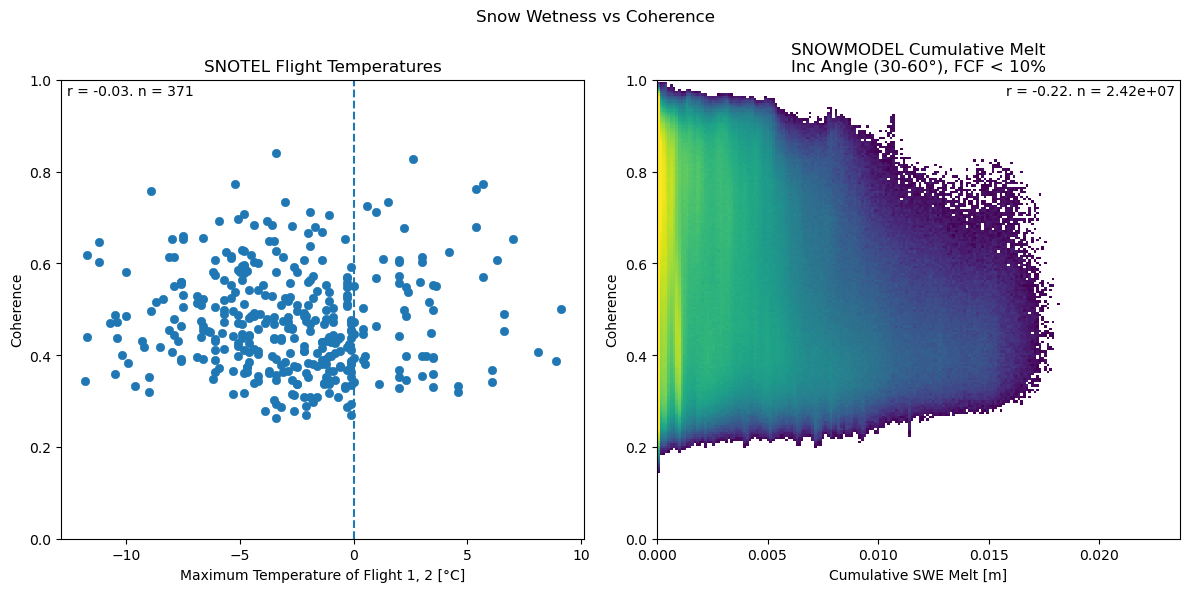

In [45]:
fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/snow')

fig, axes= plt.subplots(1, 2 , figsize = (12, 6))

ax = axes[0]
df['max_temp'] = np.max(df[['temp_t1','temp_t2']],axis= 1)
df['temp1_bins'] = pd.cut(df['max_temp'], bins = [-15, -3, 3, 15])
sns.scatterplot(x='max_temp', y='cor', data=df, ec=None, legend=True, ax = ax, palette = 'Reds')
rmse, r, n = get_stats(df['max_temp'], df['cor'])
add_text(f'r = {r:.2f}. n = {n:.0f}', ax, 'upper left')
ax.set_title('SNOTEL Flight Temperatures')

ax.axvline(0, linestyle = '--')
ax.set_xlabel('Maximum Temperature of Flight 1, 2 [°C]')

ax = axes[1]
h = ax.hist2d(cummelts, cors, bins = 200, norm=mpl.colors.LogNorm(vmin = 50, vmax = 10000), cmin = 50)
# fig.colorbar(h[3], ax = ax)
rmse, r, n = get_stats(cummelts, cors)
add_text(f'r = {r:.2f}. n = {n:.2e}', ax, 'upper right')
ax.set_title('SNOWMODEL Cumulative Melt\nInc Angle (30-60°), FCF < 10%')
ax.set_xlabel('Cumulative SWE Melt [m]')


for ax in axes:
    ax.set_ylim(0, 1)
    ax.set_ylabel('Coherence')

plt.suptitle('Snow Wetness vs Coherence')
plt.tight_layout()
plt.savefig(fig_dir.joinpath('melt_cor.png'))